<a href="https://colab.research.google.com/github/mario-i-caicedo-ai/Electrodinamica_Clasica/blob/main/cuadernos_jupyter/Ec_de_Laplace_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import imshow, show, colorbar
from matplotlib.colors import LogNorm



# Ecuación de Laplace en D=2


## Un ejemplo electrostático.

El potencial electrostático
($\phi=\phi(x,y)$) satisface la ecuación de Laplace sujeta aciertas condiciones de contorno.

$$
\frac{\partial^2\phi}{\partial{}x^2}+\frac{\partial^2\phi}{\partial{}y^2}=0\,,\quad\phi=\phi(x,y)\,.
$$

El ejemplo que queremos estudiar consiste en calcular el potencial asociado a la siguiente figura

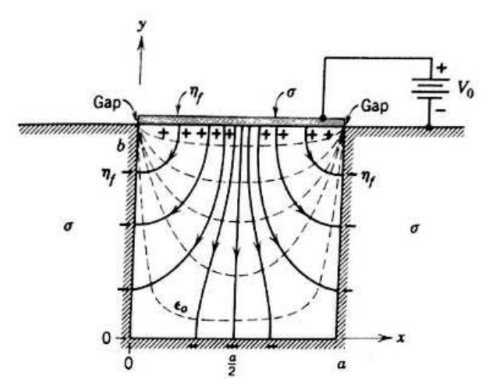

In [3]:
img = mpimg.imread('/content/Magid_Fig-5.38.png') #Replace "image.jpg" with the path of your image
plt.imshow(img)
plt.axis('off')
plt.show()

En términos matemáticos, queremos resolver la ecuación de Laplace en el interior del rectángulo $(0,a)\times(0,b)$ sometido a las condiciones de borde:

$$
\phi(0,y)=0\,,\quad\phi(a,0)=0\\
\phi(x,o)=0\,,\quad\phi(x,b)=V_0
$$

## Condiciones de Borde

$$
\phi(x,0)=0\,,\quad{}\phi(x,b)=V_0\,,\quad{}\phi(0,y)=0\,,\quad{}\phi(a,y)=0
$$

## Solución Analítica [ejercicio]

$$
V(x,y)=\frac{4V_0}{\pi}\,\sum_{impares}\,\frac{sen(n\pi{}x/a)\,senh(n\pi{}y/a)}{n\,senh(n\pi{}b/a)}
$$


Definición de la malla de cálculo y graficación.

$0<nx<150=a\,,\quad{}0<ny<100=b$,

In [4]:
nx=150
ny=100

Coeficientes de Fourier

$$
c_n\begin{cases}\frac{1}{n\,senh(n\pi{}b/a)}\,,n\mbox{ impar}\\0\,,n\mbox{ par}\end{cases}
$$

In [5]:
def coeff_sol(nx,ny,N):
  s=np.pi*ny/nx
  a=np.zeros(N) #inicializacion
  # Calculo
  for n in range(0,N):
    nn=(2*n+1)
    den=nn*np.sinh(s*nn)
    a[n]=1./den
  return a # Recuerde, a es una lista ordinaria

In [6]:
def Volt(V_0,x,y,nx,ny,N):

    c=coeff_sol(nx,ny,N) # invocando la función que construye los coeficientes

    val=0.

    for n in range(0,N):
      nn=(2*n+1)
      X=nn*np.pi*x/nx
      Y=nn*np.pi*y/nx

      val = val+c[n]*np.sin(X)*np.sinh(Y) # Suma de los términos de la serie

    val=4.*V_0*val/np.pi # El factor inicial se repone acá.
    return val


In [7]:
#N_terms=int(input('cuantos terminos desea sumar? '))

N_terms=20

# Inicialización del vector (lista) de valores que se graficaran

Z=np.zeros((nx,ny), dtype=float, order='F')

V_0=3.
for x in range (0,nx):
  for y in range (0,ny):
    Z[x,y]=Volt(V_0,x,y,nx,ny,N_terms)


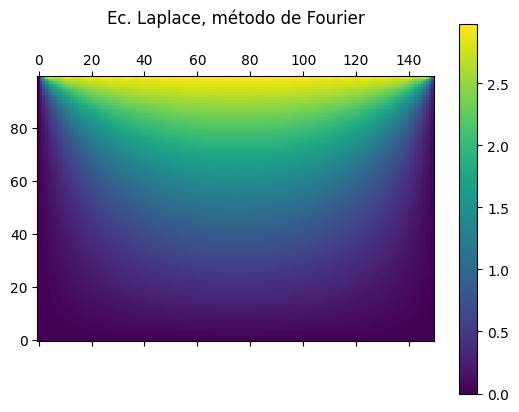

In [12]:
fig, ax = plt.subplots()

c = ax.matshow(np.transpose(Z),
              interpolation ='nearest',
               origin ='lower')
# Notese que el origen (0,0) se fija con el parámetro: lowe

fig.colorbar(c, ax = ax)
ax.set_title('Ec. Laplace, método de Fourier\n')
plt.show()

------

## Solución por un **Método de Relajación**

Estamos mostrando una versión sumamente simplificada de esta técnica de cálculo.

De manera iterativa, en cada punto de la malla el potencial se iguala a la media del potencial en sus vecinos

In [28]:

A=np.zeros((nx,ny), dtype=float, order='C')


In [29]:
import numpy as geek #Construcción de una configuración inicial
nx=150
ny=100
# 2D Array
A = geek.random.rand(nx,ny)

A=0.5*A

for m in range (0,nx):
  A[m,99]=3.


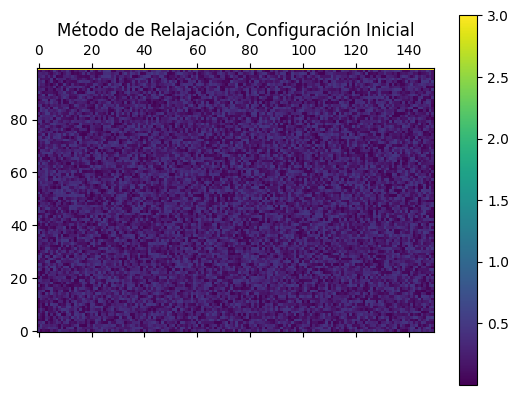

In [30]:
fig, ax = plt.subplots()

ac = ax.matshow(np.transpose(A),
              interpolation ='nearest',
               origin ='lower')

fig.colorbar(ac, ax = ax)
ax.set_title('Método de Relajación, Configuración Inicial')
plt.show()

In [31]:
I = 1
while I < 500:

  for x in range (1,nx-1):
    for y in range (1,ny-1):
      A[x,y]=(A[x-1,y]+A[x+1,y]+A[x,y-1]+A[x,y+1])/4.
  #print(I)
  I += 1

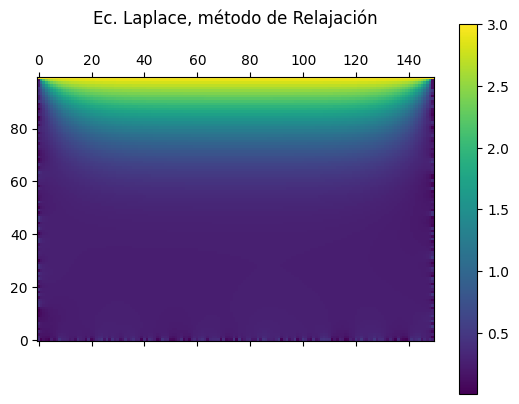

In [32]:
fig, ax = plt.subplots()

c = ax.matshow(np.transpose(A),
              interpolation ='nearest',
               origin ='lower')
# Notese que el origen (0,0) se fija con el parámetro: lowe

fig.colorbar(c, ax = ax)
ax.set_title('Ec. Laplace, método de Relajación\n')
plt.show()

------------

## Diferencia entre las dos soluciones

In [34]:
W=Z-A

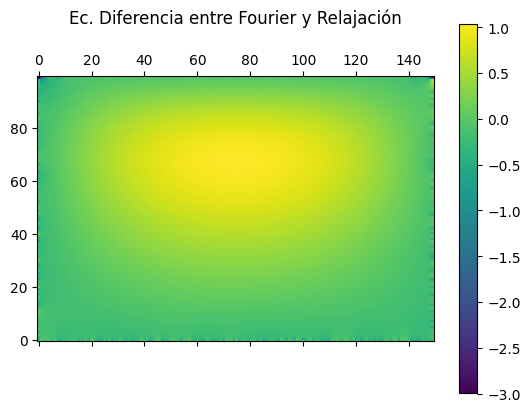

In [36]:
WT=np.transpose(W)

fig, ax = plt.subplots()

s = ax.matshow(WT,
              interpolation ='nearest',
               origin ='lower')

fig.colorbar(s, ax = ax)
ax.set_title('Ec. Diferencia entre Fourier y Relajación\n')
plt.show()